# <공공데이터 이용한 재활치료 효과 분석>

>## 공공데이터 출처 : 보건복지부 국립재활원_재활치료효과(MBI) 통계정보 (https://www.data.go.kr/data/15005530/fileData.do)

# 1. 데이터 불러오기
﻿
업로드한 csv파일을 불러옵니다.

이때 UnicodeDecodeError: 'utf-8' codec can't decode byte 에러가 발생하는 경우

인코딩 에러 무시 코드까지 추가해주면 됩니다.

﻿

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

In [7]:
data = pd.read_csv("treatment_data.csv", encoding_errors='ignore')
print(data)

      No Name       Start         End  pre-treatment  post-treatment
0      1   Կȯ  2016-09-26  2017-01-02             84              89
1      2   Կȯ  2016-10-05  2017-01-03              0               0
2      3   Կȯ  2016-09-22  2017-01-04             63              75
3      4   Կȯ  2016-10-10  2017-01-05              0               0
4      5   Կȯ  2016-10-07  2017-01-06             66              70
..   ...  ...         ...         ...            ...             ...
397  398   Կȯ  2021-09-06  2021-12-28              0               0
398  399   Կȯ  2021-10-01  2021-12-29             38              50
399  400   Կȯ  2021-11-15  2021-12-30             32              26
400  401   Կȯ  2021-10-06  2021-12-31             74              82
401  402   Կȯ  2021-07-07  2021-12-31             43              53

[402 rows x 6 columns]


# 2. 윌콕슨 부호 순위 검정 수행

In [10]:
stat, p = wilcoxon(data['pre-treatment'], data['post-treatment'])

# 3. 결과 보기 : 유의수준 설정하여 귀무가설 기각 여부 판단
﻿
유의수준은 0.05로 설정합니다.

p-value(결과값)이 유의수준보다 작으면 귀무가설을 기각할 수 있습니다.


>- 귀무가설 : 전후 치료간 차이가 없다.

>- 대립가설 : 전후 치료간 차이가 있다.


따라서 귀무가설 기각시, 전후 치료간 차이(효과)가 있다는 대립가설을 채택할 수 있습니다.

﻿

In [14]:
print('Statistic:', stat)
print('p-value:', p)
if p > 0.05:
  print('The treatment does not work!')
else:
  print('The treatment works!')

Statistic: 3140.0
p-value: 8.59541297147113e-43
The treatment works!


# 4. 환자의 치료 전후 효과성 비교 시각화
﻿박스 플롯을 이용해 두 값의 중앙값, 이상치를 확인합니다.

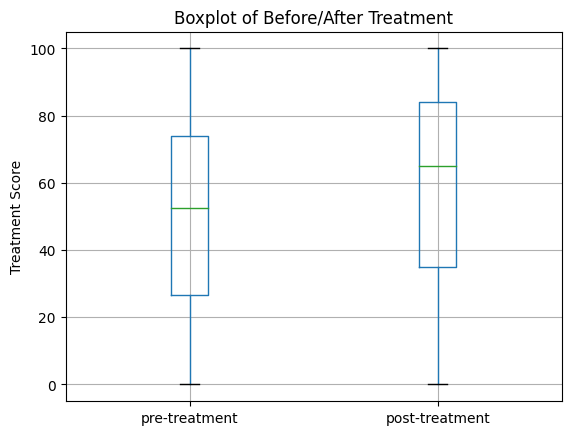

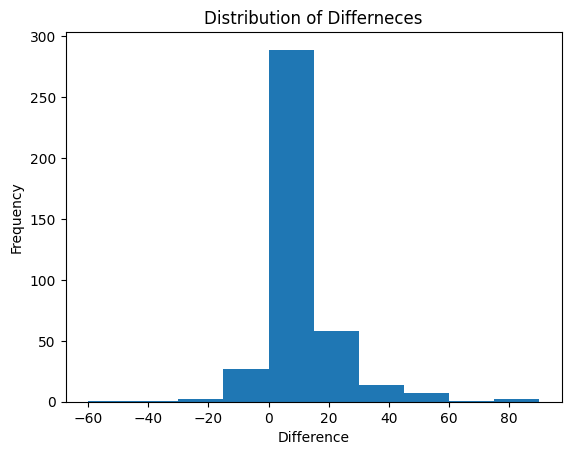

In [15]:
import matplotlib.pyplot as plt

# 중앙값, 이상치 등 확인 - boxplot
fig, ax = plt.subplots()
data.boxplot(['pre-treatment', 'post-treatment'], ax=ax)
ax.set_title('Boxplot of Before/After Treatment')
ax.set_ylabel('Treatment Score')
plt.show()

# 두 변수 차이에 대한 분포 시각화 - Histogram
fig, ax = plt.subplots()
data['diff'] = data['post-treatment'] - data['pre-treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differneces')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
plt.show()